In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\P10414651\Documents\Official\Pocathon 2019\Dataset\HousingRent.csv')

In [16]:
df.head()

,Location ref,Rent group,Rent amt,Tenant income,Tenant working,Occupants,No of adult tenants,No of child tenants,Arears history,Arears reason,Reported date,Curr balance,Prev balance
0,1001,W,125,10.0,N,4,2,4,Y,Divorced,3/15/2010,100.0,20.0
1,1002,M,500,500.0,Y,5,1,4,Y,Income shortage,28/2/2011,400.0,200.0
2,100300,B,250,500.0,Y,8,2,6,Y,Lost job,15/01/2010,200.0,100.0
3,1004,D,10,600.0,Y,1,1,0,N,NaN,NaN,0.0,0.0
4,1005,M,200,300.0,Y,7,4,3,Y,Unknown,16/05/2011,250.0,155.0


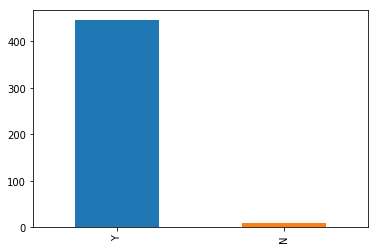

In [19]:
df['Arears history'].value_counts().plot.bar()

In [20]:
df['Arears history'].value_counts()

Y    445
N     10
Name: Arears history, dtype: int64

In [21]:
df_Y = df[df['Arears history']=='Y']
df_N = df[df['Arears history']=='N']

In [22]:
count_Y,count_N = df['Arears history'].value_counts()
df_Y_under = df_Y.sample(count_N)

In [23]:
df_under = pd.concat([df_Y_under,df_N],axis=0)

In [24]:
df_under.shape

(20, 13)

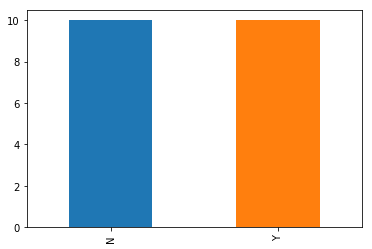

In [25]:
df_under['Arears history'].value_counts().plot.bar()

In [26]:
df_under['Arears history'].value_counts()

N    10
Y    10
Name: Arears history, dtype: int64

In [27]:
df_N_over = df_N.sample(count_Y, replace = True)

In [28]:
df_N_over.shape

(445, 13)

In [29]:
df_Y.shape

(445, 13)

In [30]:
df_over = pd.concat([df_Y,df_N_over],axis=0)

In [31]:
df_over.shape

(890, 13)

In [32]:
df_under.shape

(20, 13)

In [ ]:
Now we have two dataframes , One is under-sampled and the other one is over-samples. 
We have solved the issue of class imbalance in this dataset.

But Re-sampling has disadvantages as well like under-sampling might lead to information loss and over-sampling might lead to over-fitting.

So, Let us see how they perform using different algorithms after doing EDA for over-sampled data-set and then let's head over to under-sampled one

In [34]:
df_over.describe()

,Location ref,Rent amt,Tenant income,Occupants,No of adult tenants,No of child tenants,Curr balance,Prev balance
count,8.900000e+02,890.000000,888.000000,890.000000,890.000000,890.000000,618.000000,618.000000
mean,1.959414e+06,51.367416,281.531532,3.123596,1.176404,1.980899,180.389968,362.920712
std,3.808353e+06,88.261173,267.182842,2.210621,0.676875,2.022560,124.874076,282.764081
min,1.001000e+03,10.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.004030e+05,10.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,1.008080e+05,12.500000,406.000000,2.500000,1.000000,1.000000,256.000000,600.000000
75%,1.001844e+06,55.000000,480.000000,5.000000,1.000000,4.000000,256.000000,600.000000
max,1.008062e+07,600.000000,700.000000,8.000000,5.000000,6.000000,650.000000,600.000000


In [35]:
df_over.isnull().sum()

Location ref             0
Rent group               0
Rent amt                 0
Tenant income            2
Tenant working           0
Occupants                0
No of adult tenants      0
No of child tenants      0
Arears history           0
Arears reason          445
Reported date          445
Curr balance           272
Prev balance           272
dtype: int64

In [36]:
df_under.isnull().sum()

Location ref            0
Rent group              0
Rent amt                0
Tenant income           0
Tenant working          0
Occupants               0
No of adult tenants     0
No of child tenants     0
Arears history          0
Arears reason          10
Reported date          10
Curr balance            6
Prev balance            6
dtype: int64

In [37]:
df_over['Tenant income'].fillna(df_over['Tenant income'].mean(),inplace=True)
df_over['Arears reason'].fillna(df_over['Arears reason'].mode()[0],inplace=True)
df_over['Reported date'].fillna(df_over['Reported date'].mode()[0],inplace=True)
df_over['Curr balance'].fillna(df_over['Curr balance'].mean(),inplace=True)
df_over['Prev balance'].fillna(df_over['Prev balance'].mean(),inplace=True)

df_under['Arears reason'].fillna(df_under['Arears reason'].mode()[0],inplace=True)
df_under['Reported date'].fillna(df_under['Reported date'].mode()[0],inplace=True)
df_under['Curr balance'].fillna(df_under['Curr balance'].mean(),inplace=True)
df_under['Prev balance'].fillna(df_under['Prev balance'].mean(),inplace=True)

df['Tenant income'].fillna(df['Tenant income'].mean(),inplace=True)
df['Arears reason'].fillna(df['Arears reason'].mode()[0],inplace=True)
df['Reported date'].fillna(df['Reported date'].mode()[0],inplace=True)
df['Curr balance'].fillna(df['Curr balance'].mean(),inplace=True)
df['Prev balance'].fillna(df['Prev balance'].mean(),inplace=True)


In [38]:
df_over.isnull().sum()

Location ref           0
Rent group             0
Rent amt               0
Tenant income          0
Tenant working         0
Occupants              0
No of adult tenants    0
No of child tenants    0
Arears history         0
Arears reason          0
Reported date          0
Curr balance           0
Prev balance           0
dtype: int64

In [39]:
df_under.isnull().sum()

Location ref           0
Rent group             0
Rent amt               0
Tenant income          0
Tenant working         0
Occupants              0
No of adult tenants    0
No of child tenants    0
Arears history         0
Arears reason          0
Reported date          0
Curr balance           0
Prev balance           0
dtype: int64

In [40]:
df.isnull().sum()

Location ref           0
Rent group             0
Rent amt               0
Tenant income          0
Tenant working         0
Occupants              0
No of adult tenants    0
No of child tenants    0
Arears history         0
Arears reason          0
Reported date          0
Curr balance           0
Prev balance           0
dtype: int64

In [41]:
df_over = df_over.iloc[:,1:]

In [42]:
df_over['Rent group'].value_counts()

D    819
M     38
W     21
B     12
Name: Rent group, dtype: int64

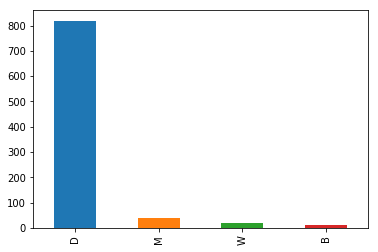

In [43]:
df_over['Rent group'].value_counts().plot.bar()

In [44]:
df_over[df_over['Arears history']=='Y']['Rent group'].value_counts()

D    374
M     38
W     21
B     12
Name: Rent group, dtype: int64

In [45]:
df_over[df_over['Arears history']=='N']['Rent group'].value_counts()

D    445
Name: Rent group, dtype: int64

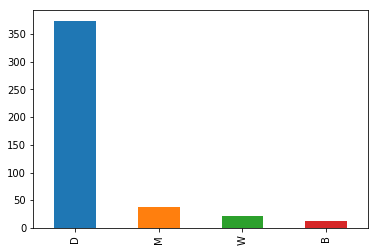

In [46]:
df_over[df_over['Arears history']=='Y']['Rent group'].value_counts().plot.bar()

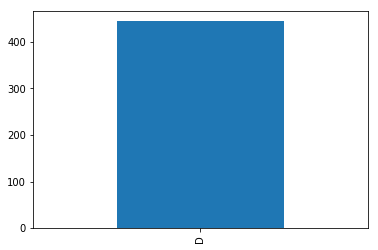

In [47]:
df_over[df_over['Arears history']=='N']['Rent group'].value_counts().plot.bar()

In [48]:
a=445/819*100

In [49]:
print ('% of rent arears history by rent group:',a)

% of rent arears history by rent group: 54.33455433455433


In [50]:
df_over['Rent amt'].value_counts()

10     445
55     360
125     21
500     15
200     14
600      7
245      5
60       5
58       5
220      2
250      2
240      1
235      1
230      1
300      1
63       1
400      1
54       1
50       1
15       1
Name: Rent amt, dtype: int64

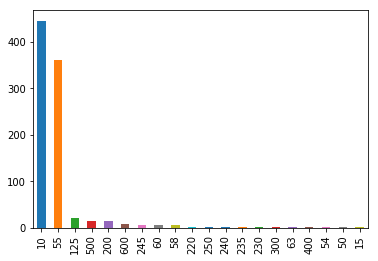

In [51]:
df_over['Rent amt'].value_counts().plot.bar()

In [53]:
df_over[df_over['Arears history']=='Y']['Rent amt'].value_counts()

55     360
125     21
500     15
200     14
600      7
245      5
60       5
58       5
220      2
250      2
240      1
235      1
230      1
400      1
63       1
300      1
54       1
50       1
15       1
Name: Rent amt, dtype: int64

In [54]:
df_over[df_over['Arears history']=='N']['Rent amt'].value_counts()

10    445
Name: Rent amt, dtype: int64

In [55]:
df_over['Tenant income'].value_counts()

0.000000      361
462.000000     95
406.000000     78
580.000000     54
460.000000     48
670.000000     48
480.000000     43
700.000000     43
600.000000     36
500.000000      9
300.000000      8
1.000000        4
11.000000       4
2.000000        4
10.000000       4
12.000000       3
20.000000       3
13.000000       3
301.000000      2
309.000000      2
507.000000      2
506.000000      2
502.000000      2
302.000000      2
15.000000       2
400.000000      2
14.000000       2
16.000000       2
23.000000       2
31.000000       2
401.000000      2
501.000000      2
308.000000      2
24.000000       2
402.000000      2
281.531532      2
18.000000       1
22.000000       1
9.000000        1
30.000000       1
8.000000        1
200.000000      1
Name: Tenant income, dtype: int64

In [56]:
df_over[df_over['Arears history']=='Y']['Tenant income'].value_counts()

0.000000      361
500.000000      9
300.000000      8
10.000000       4
11.000000       4
2.000000        4
1.000000        4
12.000000       3
20.000000       3
13.000000       3
507.000000      2
15.000000       2
400.000000      2
14.000000       2
16.000000       2
281.531532      2
301.000000      2
309.000000      2
401.000000      2
302.000000      2
502.000000      2
23.000000       2
31.000000       2
308.000000      2
402.000000      2
506.000000      2
24.000000       2
501.000000      2
30.000000       1
8.000000        1
200.000000      1
18.000000       1
22.000000       1
9.000000        1
Name: Tenant income, dtype: int64

In [57]:
df_over[df_over['Arears history']=='N']['Tenant income'].value_counts()

462.0    95
406.0    78
580.0    54
670.0    48
460.0    48
480.0    43
700.0    43
600.0    36
Name: Tenant income, dtype: int64

In [58]:
df_over['Tenant working'].value_counts()

Y    831
N     59
Name: Tenant working, dtype: int64

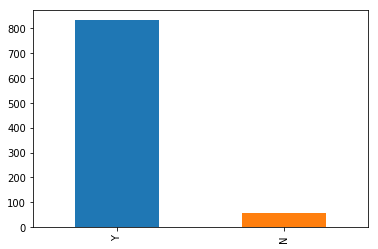

In [59]:
df_over['Tenant working'].value_counts().plot.bar()

In [60]:
df_over[df_over['Arears history']=='Y']['Tenant working'].value_counts()

Y    386
N     59
Name: Tenant working, dtype: int64

In [61]:
df_over[df_over['Arears history']=='N']['Tenant working'].value_counts()

Y    445
Name: Tenant working, dtype: int64

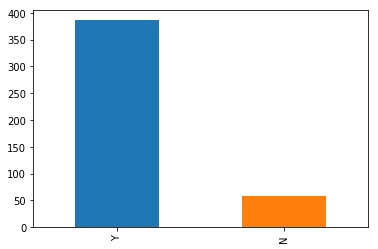

In [62]:
df_over[df_over['Arears history']=='Y']['Tenant working'].value_counts().plot.bar()

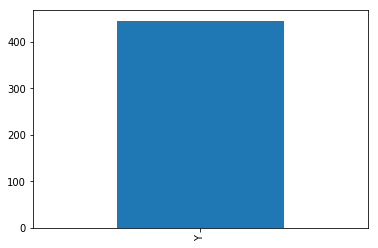

In [63]:
df_over[df_over['Arears history']=='N']['Tenant working'].value_counts().plot.bar()

In [64]:
a=386/831*100
b=59/59*100

In [65]:
print('Percentage of people with tenant working who got arears history : ',a)
print('Percentage of people with tenant not working who got arears history : ',b)

Percentage of people with tenant working who got arears history :  46.450060168471715
Percentage of people with tenant not working who got arears history :  100.0


In [ ]:
There is a clear inference that people not working are likely to get arears history

In [66]:
df_over['No of child tenants'].value_counts()

0    445
4    381
3     24
2     15
5     13
6     12
Name: No of child tenants, dtype: int64

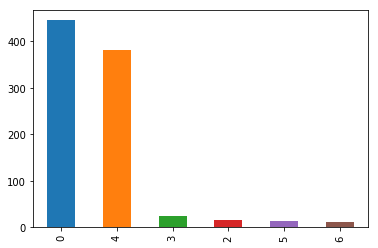

In [67]:
df_over['No of child tenants'].value_counts().plot.bar()

In [68]:
df_over[df_over['Arears history']=='Y']['No of child tenants'].value_counts()

4    381
3     24
2     15
5     13
6     12
Name: No of child tenants, dtype: int64

In [69]:
df_over[df_over['Arears history']=='N']['No of child tenants'].value_counts()

0    445
Name: No of child tenants, dtype: int64

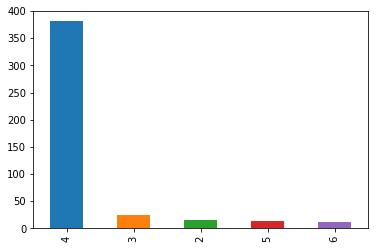

In [70]:
df_over[df_over['Arears history']=='Y']['No of child tenants'].value_counts().plot.bar()

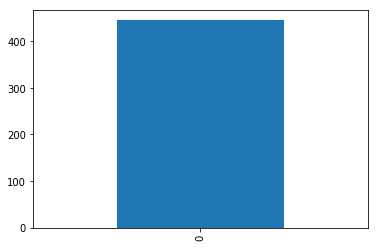

In [71]:
df_over[df_over['Arears history']=='N']['No of child tenants'].value_counts().plot.bar()

In [72]:
a = 381/445*100
b = 445/445*100

In [74]:
print ('% of people who has got more than 2 depenent childs have arrears history:',b)
print ('% of people who has got less than 2 depenent childs have arrears history:',a)

% of people who has got more than 2 depenent childs have arrears history: 100.0
% of people who has got less than 2 depenent childs have arrears history: 85.61797752808988


In [75]:
df_over.skew()

Rent amt               4.379907
Tenant income          0.071531
Occupants              0.285264
No of adult tenants    4.328143
No of child tenants    0.114377
Curr balance          -0.229335
Prev balance          -0.458352
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FF2897CEB8>,
      dtype=object)

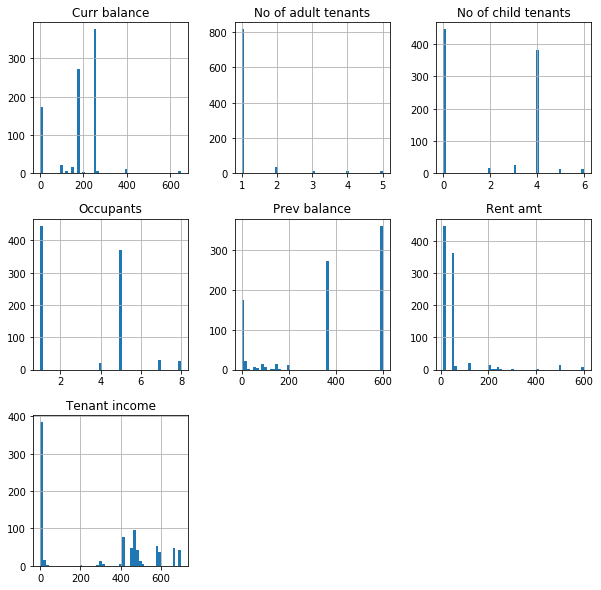

In [76]:
plt.rcParams['figure.figsize'] = [10, 10]
df_over.hist(bins=50)

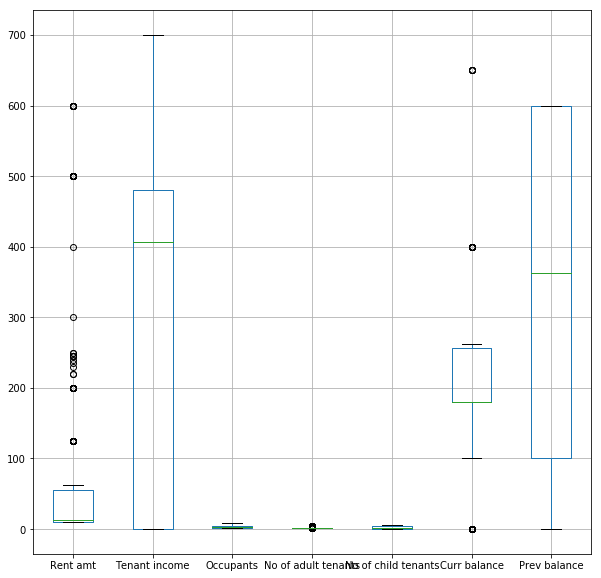

In [77]:
df_over.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FF289E9A20>,
      dtype=object)

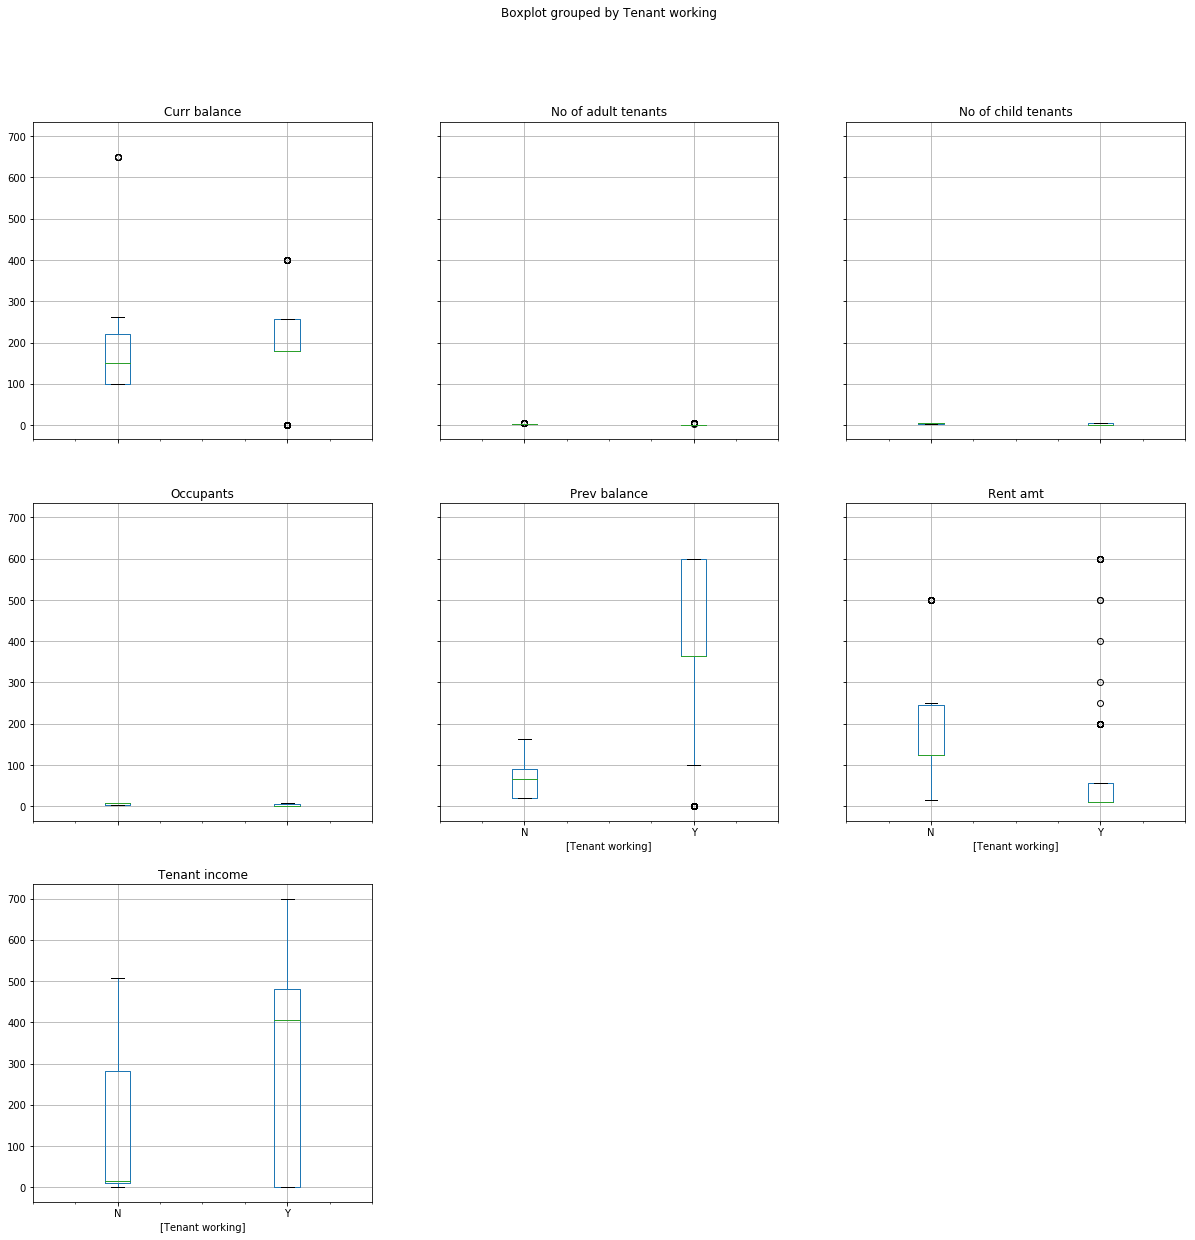

In [78]:
plt.rcParams['figure.figsize'] = [20, 20]
df_over.boxplot(by='Tenant working')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FF29148BE0>,
      dtype=object)

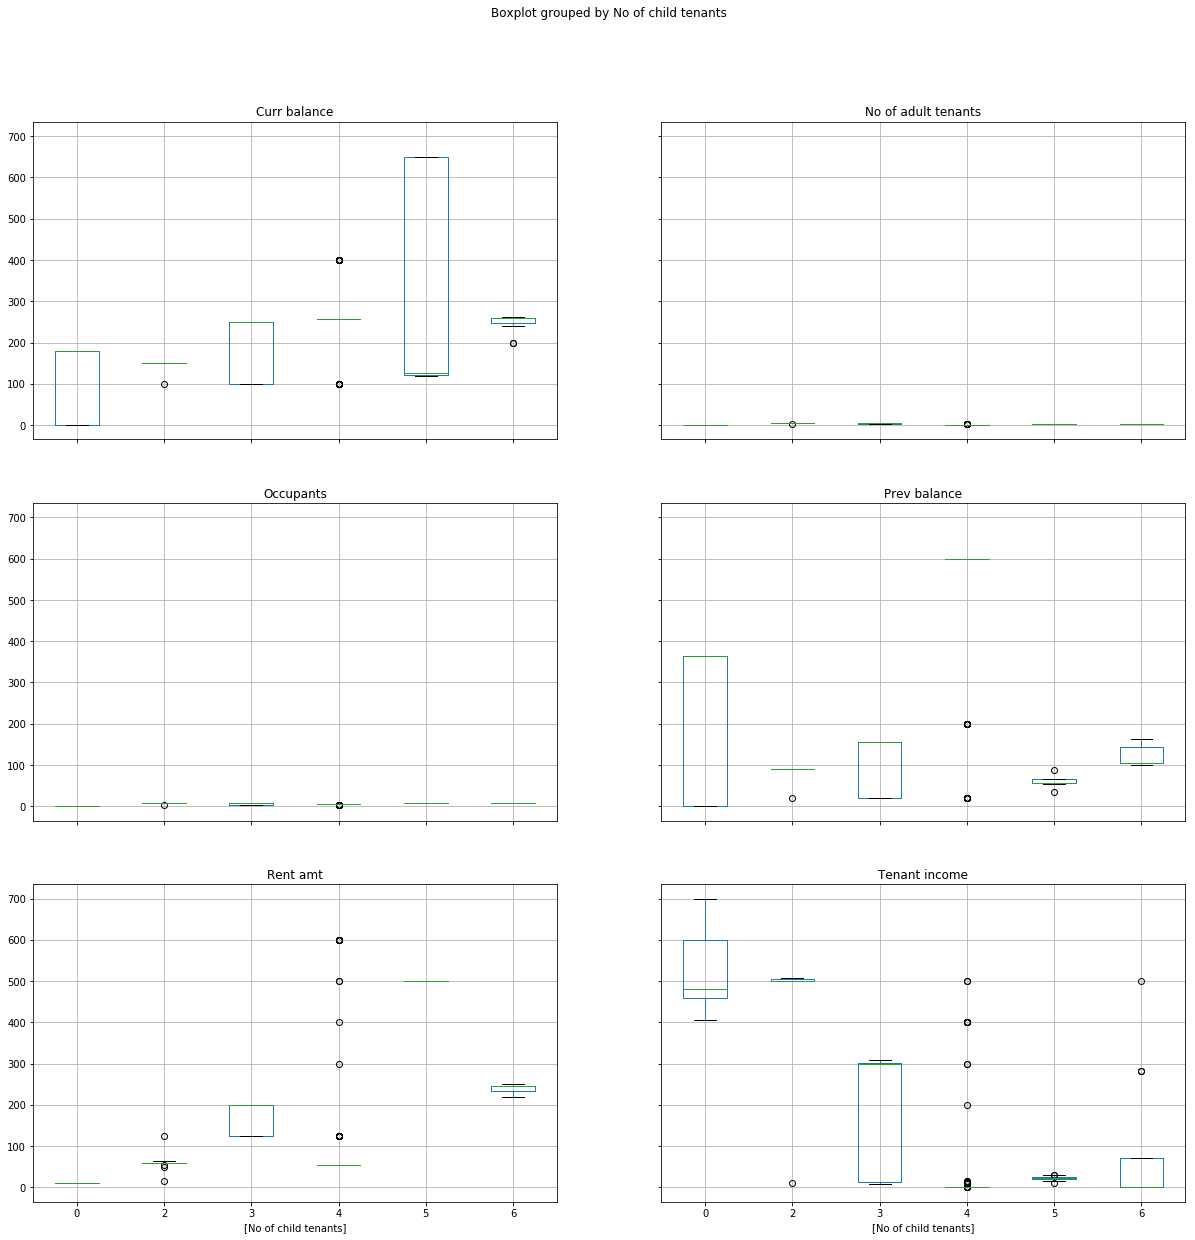

In [79]:
df_over.boxplot(by='No of child tenants')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FF2ABC2C18>,
      dtype=object)

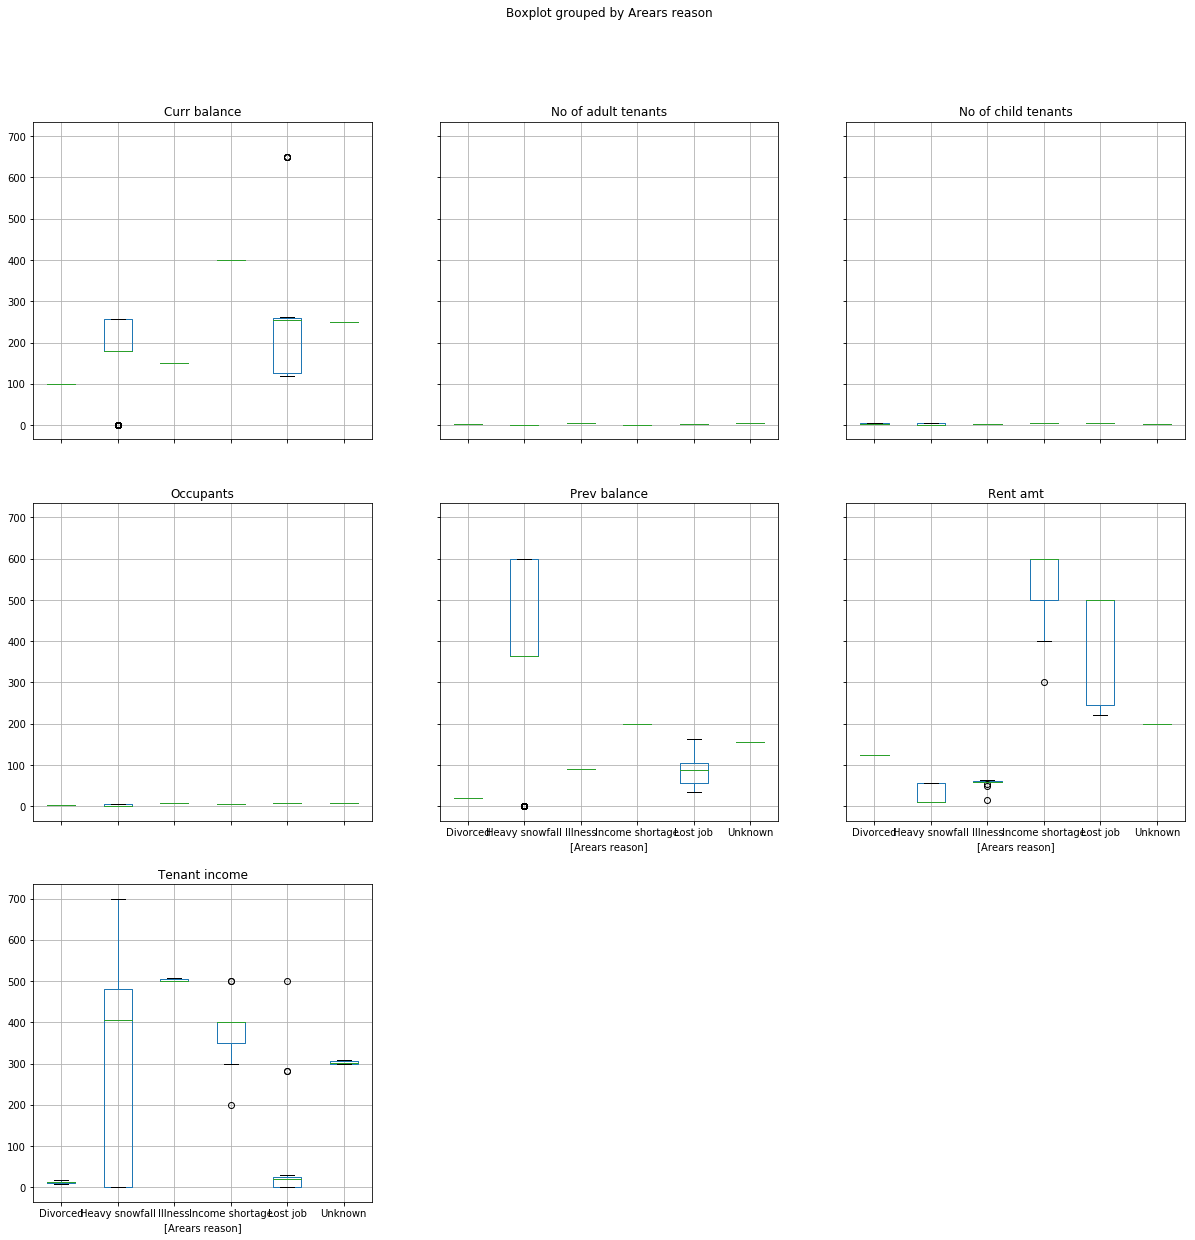

In [80]:
df_over.boxplot(by='Arears reason')

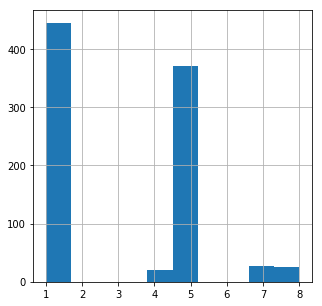

In [81]:
plt.rcParams['figure.figsize'] = [5, 5]
df_over['Occupants'].hist()

In [82]:
df_over['Occupants_log'] = np.log(df_over['Occupants'])
df_under['Occupants_log'] = np.log(df_under['Occupants'])
df['Occupants_log'] = np.log(df['Occupants'])

Skewness 0.049178405580271305


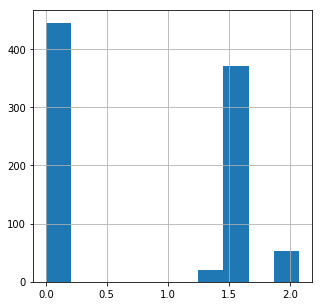

In [83]:
df_over['Occupants_log'].hist()
print('Skewness',df_over['Occupants_log'].skew())

In [84]:
df_over.head()

,Rent group,Rent amt,Tenant income,Tenant working,Occupants,No of adult tenants,No of child tenants,Arears history,Arears reason,Reported date,Curr balance,Prev balance,Occupants_log
0,W,125,10.0,N,4,2,4,Y,Divorced,3/15/2010,100.0,20.0,1.386294
1,M,500,500.0,Y,5,1,4,Y,Income shortage,28/2/2011,400.0,200.0,1.609438
2,B,250,500.0,Y,8,2,6,Y,Lost job,15/01/2010,200.0,100.0,2.079442
4,M,200,300.0,Y,7,4,3,Y,Unknown,16/05/2011,250.0,155.0,1.945910
5,D,63,500.0,N,7,5,2,Y,Illness,29/03/2010,150.0,90.0,1.945910


In [99]:
cat_vars=['Rent group', 'Rent amt', 'Tenant working', 'Occupants',
       'Arears reason','Arears history', 'Reported date','Curr balance', 'Prev balance']
from sklearn.preprocessing import LabelEncoder #needed for label encoding the categorical variables
encoder = LabelEncoder()
for i in cat_vars:
    df_over[i]=encoder.fit_transform(df_over[i])
for i in cat_vars:
    df_under[i]=encoder.fit_transform(df_under[i])
for i in cat_vars:
    df[i]=encoder.fit_transform(df[i])

In [87]:
df_over.head()
print(df_under.head())
print(df.head())

     Location ref  Rent group  Rent amt  Tenant income  Tenant working  \
406       1007028           1         2           23.0               0   
153        100808           0         1            0.0               1   
426      10070356           1         2           20.0               0   
170        100808           0         1            0.0               1   
25         100801           0         1            0.0               1   

     Occupants  No of adult tenants  No of child tenants  Arears history  \
406          2                    3                    2               1   
153          1                    1                    1               1   
426          2                    3                    2               1   
170          1                    1                    1               1   
25           1                    1                    1               1   

      Arears reason Reported date  Curr balance  Prev balance  Occupants_log  
406        Lost job

In [100]:
df_over.columns

Index(['Rent group', 'Rent amt', 'Tenant income', 'Tenant working',
       'Occupants', 'No of adult tenants', 'No of child tenants',
       'Arears history', 'Arears reason', 'Reported date', 'Curr balance',
       'Prev balance', 'Occupants_log'],
      dtype='object')

In [102]:
x_over=df_over[['Rent group', 'Rent amt', 'Tenant income', 'Tenant working', 'Occupants_log','Arears reason','Reported date',
       'Curr balance', 'Prev balance']]
x_under=df_under[['Rent group', 'Rent amt', 'Tenant income', 'Tenant working', 'Occupants_log','Arears reason','Reported date',
       'Curr balance', 'Prev balance']]
y_over=df_over['Arears history']
y_under=df_under['Arears history']
x=df[['Rent group', 'Rent amt', 'Tenant income', 'Tenant working', 'Occupants_log','Arears reason','Reported date',
       'Curr balance', 'Prev balance']]
y=df['Arears history']

In [103]:
from sklearn.model_selection import train_test_split
x_over_train,x_over_test,y_over_train,y_over_test = train_test_split(x_over,y_over,test_size=0.2,random_state=3)
x_under_train,x_under_test,y_under_train,y_under_test = train_test_split(x_under,y_under,test_size=0.2,random_state=3)

In [104]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
model=RandomForestClassifier(n_estimators=15,random_state=3)
model.fit(x_over_train,y_over_train)
y_over_pred=model.predict(x_over_test)
print("Accuracy Score is :",accuracy_score(y_over_pred,y_over_test))
print("Classification_Report\n",classification_report(y_over_pred,y_over_test))
print("confusion_matrix\n",confusion_matrix(y_over_pred,y_over_test))

Accuracy Score is : 1.0
Classification_Report
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        78
          1       1.00      1.00      1.00       100

avg / total       1.00      1.00      1.00       178

confusion_matrix
 [[ 78   0]
 [  0 100]]


In [106]:
model=RandomForestClassifier(n_estimators=15,random_state=3)
model.fit(x_under_train,y_under_train)
y_under_pred=model.predict(x_under_test)
print("Accuracy Score is :",accuracy_score(y_under_pred,y_under_test))
print("Classification_Report\n",classification_report(y_under_pred,y_under_test))
print("confusion_matrix\n",confusion_matrix(y_under_pred,y_under_test))

Accuracy Score is : 1.0
Classification_Report
              precision    recall  f1-score   support

          0       1.00      1.00      1.00         2
          1       1.00      1.00      1.00         2

avg / total       1.00      1.00      1.00         4

confusion_matrix
 [[2 0]
 [0 2]]


In [107]:
model=RandomForestClassifier(n_estimators=15,random_state=3)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Accuracy Score is :",accuracy_score(y_pred,y_test))
print("Classification_Report\n",classification_report(y_pred,y_test))
print("confusion_matrix\n",confusion_matrix(y_pred,y_test))

Accuracy Score is : 1.0
Classification_Report
              precision    recall  f1-score   support

          1       1.00      1.00      1.00        91

avg / total       1.00      1.00      1.00        91

confusion_matrix
 [[91]]


In [108]:
model=RandomForestClassifier(n_estimators=15,random_state=3,class_weight="balanced")
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Accuracy Score is :",accuracy_score(y_pred,y_test))
print("Classification_Report\n",classification_report(y_pred,y_test))
print("confusion_matrix\n",confusion_matrix(y_pred,y_test))

Accuracy Score is : 1.0
Classification_Report
              precision    recall  f1-score   support

          1       1.00      1.00      1.00        91

avg / total       1.00      1.00      1.00        91

confusion_matrix
 [[91]]


In [109]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(random_state=3)
model.fit(x_over_train,y_over_train)
y_over_pred=model.predict(x_over_test)
print("Accuracy Score is :",accuracy_score(y_over_pred,y_over_test))
print("Classification_Report\n",classification_report(y_over_pred,y_over_test))
print("confusion_matrix\n",confusion_matrix(y_over_pred,y_over_test))

Accuracy Score is : 0.9943820224719101
Classification_Report
              precision    recall  f1-score   support

          0       1.00      0.99      0.99        79
          1       0.99      1.00      0.99        99

avg / total       0.99      0.99      0.99       178

confusion_matrix
 [[78  1]
 [ 0 99]]


In [110]:
model.fit(x_under_train,y_under_train)
y_under_pred=model.predict(x_under_test)
print("Accuracy Score is :",accuracy_score(y_under_pred,y_under_test))
print("Classification_Report\n",classification_report(y_under_pred,y_under_test))
print("confusion_matrix\n",confusion_matrix(y_under_pred,y_under_test))

Accuracy Score is : 1.0
Classification_Report
              precision    recall  f1-score   support

          0       1.00      1.00      1.00         2
          1       1.00      1.00      1.00         2

avg / total       1.00      1.00      1.00         4

confusion_matrix
 [[2 0]
 [0 2]]


In [111]:
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Accuracy Score is :",accuracy_score(y_pred,y_test))
print("Classification_Report\n",classification_report(y_pred,y_test))
print("confusion_matrix\n",confusion_matrix(y_pred,y_test))

Accuracy Score is : 1.0
Classification_Report
              precision    recall  f1-score   support

          1       1.00      1.00      1.00        91

avg / total       1.00      1.00      1.00        91

confusion_matrix
 [[91]]


In [112]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(random_state=3)
model.fit(x_over_train,y_over_train)
y_over_pred=model.predict(x_over_test)
print("Accuracy Score is :",accuracy_score(y_over_pred,y_over_test))
print("Classification_Report\n",classification_report(y_over_pred,y_over_test))
print("confusion_matrix\n",confusion_matrix(y_over_pred,y_over_test))

Accuracy Score is : 0.9943820224719101
Classification_Report
              precision    recall  f1-score   support

          0       1.00      0.99      0.99        79
          1       0.99      1.00      0.99        99

avg / total       0.99      0.99      0.99       178

confusion_matrix
 [[78  1]
 [ 0 99]]
